In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from yellowbrick.features import pca_decomposition

In [3]:
df_15 = pd.read_csv('../data/survey_scores_clean_15.csv')
df_16 = pd.read_csv('../data/survey_scores_clean_16.csv')
df_17 = pd.read_csv('../data/survey_scores_clean_17.csv')
df_18 = pd.read_csv('../data/survey_scores_clean_18.csv')
df_19 = pd.read_csv('../data/survey_scores_clean_19.csv')

In [4]:
df_19.head()

,dbn,school_name,student_response_rate,1a_2_s,1a_3_s,1a_4_s,1a_5_s,1b_1_s,1b_2_s,1b_3_s,...,10d_4_p,10e_1_p,10e_2_p,10e_3_p,10e_4_p,number_tested_ela,mean_score_ela,number_tested_math,mean_score_math,combined_mean_score
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,95.0,10.0,20.0,39.0,16.0,15.0,5.0,23.0,...,40.0,60.0,0.0,0.0,40.0,198.0,589.348511,194.0,586.479370,587.928579
1,01M140,P.S. 140 NATHAN STRAUS,87.0,8.0,28.0,38.0,11.0,14.0,5.0,22.0,...,60.0,40.0,0.0,20.0,60.0,216.0,590.851868,219.0,588.333313,589.583906
2,01M184,P.S. 184M SHUANG WEN,100.0,9.0,22.0,46.0,14.0,10.0,9.0,23.0,...,89.0,11.0,6.0,13.0,63.0,413.0,612.617432,422.0,619.056885,615.871862
3,01M188,P.S. 188 THE ISLAND SCHOOL,66.0,0.0,0.0,7.0,93.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,269.0,593.821533,219.0,597.223755,595.348350
4,01M332,UNIVERSITY NEIGHBORHOOD MIDDLE SCHOOL,92.0,3.0,11.0,59.0,19.0,9.0,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,175.0,592.234314,173.0,586.115601,589.192540


In [5]:
df_19.shape

(482, 1044)

### Dimentional reduction using PCA
The goal is to see if the survey has predictive power, so all numberical data from the surveys are going to be used to predict the combined score (from ELA and Math).

In [6]:
# start with year 2019 instiating X and y
X_19 = df_19.iloc[:, 2:]
X_19 = X_19.iloc[:, :-6]

y_19 = df_19['combined_mean_score']

In [7]:
X_19.head(2)

,student_response_rate,1a_2_s,1a_3_s,1a_4_s,1a_5_s,1b_1_s,1b_2_s,1b_3_s,1b_4_s,1b_5_s,...,10c_2_p,10c_3_p,10c_4_p,10d_1_p,10d_2_p,10d_3_p,10d_4_p,10e_1_p,10e_2_p,10e_3_p
0,95.0,10.0,20.0,39.0,16.0,15.0,5.0,23.0,38.0,17.0,...,0.0,0.0,40.0,60.0,0.0,0.0,40.0,60.0,0.0,0.0
1,87.0,8.0,28.0,38.0,11.0,14.0,5.0,22.0,45.0,17.0,...,0.0,0.0,60.0,40.0,0.0,0.0,60.0,40.0,0.0,20.0


In [8]:
y_19[:2]

0    587.928579
1    589.583906
Name: combined_mean_score, dtype: float64

In [138]:
len(X_train_ss_19)

361

In [41]:
# train test split
X_train_19, X_test_19, y_train_19, y_test_19 = train_test_split(X_19, y_19, random_state=77)

# Instantiate our StandardScaler
ss = StandardScaler()

# Standardize X_train
X_train_ss_19 = ss.fit_transform(X_train_19)

# Standardize X_test
X_test_ss_19 = ss.transform(X_test_19)

In [42]:
# instatiate pca
pca_19 = PCA()

In [43]:
# fit
pca_19.fit(X_train_ss_19)

PCA()

In [44]:
# transform to get pcs
Z_train_19 = pca_19.transform(X_train_ss_19)

In [45]:
Z_test_19 = pca_19.transform(X_test_ss_19)

In [130]:
# explained variance 
var_exp = pca_19.explained_variance_ratio_
print(f'Explained variance (first 50 components): {var_exp[:50]}\n')

# cumulative explained variance
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 50 components): {cum_var_exp[:50]}')

Explained variance (first 50 components): [0.21257416 0.06864355 0.05272137 0.04946381 0.03888201 0.03116846
 0.02331199 0.0224053  0.01957751 0.0141135  0.01200963 0.01133517
 0.01116069 0.00995797 0.00973428 0.00907993 0.00865345 0.00814028
 0.0079028  0.00745802 0.0070929  0.00689484 0.00675057 0.00652178
 0.00586924 0.00564668 0.00540444 0.00519378 0.00502272 0.00490641
 0.0048205  0.00463201 0.0045002  0.00443364 0.00429517 0.00428132
 0.00416435 0.00402749 0.00394929 0.00389912 0.00385258 0.00372619
 0.00368739 0.00363456 0.0035194  0.00349248 0.0033991  0.00336211
 0.00325636 0.00314561]

Cumulative explained variance (first 50 components): [0.21257416 0.2812177  0.33393908 0.38340289 0.4222849  0.45345336
 0.47676535 0.49917065 0.51874815 0.53286165 0.54487128 0.55620645
 0.56736714 0.57732511 0.58705939 0.59613932 0.60479277 0.61293305
 0.62083585 0.62829387 0.63538677 0.64228161 0.64903218 0.65555395
 0.6614232  0.66706988 0.67247432 0.6776681  0.68269082 0.68759723
 0.692417

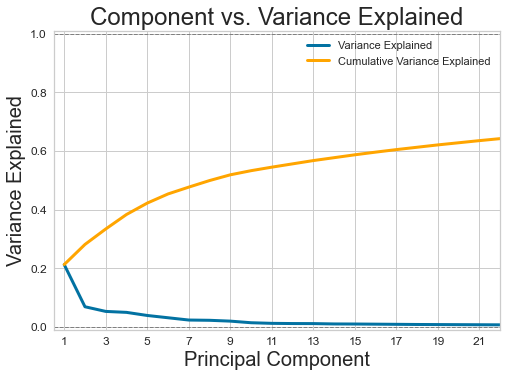

In [151]:
# from pca lecture notes
# Plot the variance explained (and cumulative variance explained).

# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')

# Plot the cumulative explained variance.
plt.plot(range(len(var_exp)), cum_var_exp, lw=3, color = 'orange', label = 'Cumulative Variance Explained')

# Add horizontal lines at y=0 and y=1.
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the limits of the axes.
plt.xlim([-0.5,21])
plt.ylim([-0.01,1.01])

# Label the axes.
plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)

# Make the tick labels bigger
plt.xticks(range(0, 21, 2), range(1, 22, 2), fontsize=12)
plt.yticks(fontsize=12)
    
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);

In [152]:
eigenvals = pca.explained_variance_

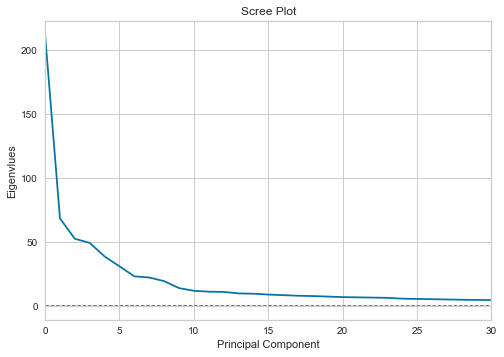

In [155]:
# scree plot
plt.plot(var_explained)

plt.xlabel('Principal Component')
plt.ylabel('Eigenvlues')
plt.title('Scree Plot')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')
plt.xlim(0, 30);

### Model with linear regression

In [156]:
# setup pipeline with PCA and linear regression
pipe_19 = make_pipeline(PCA(), LinearRegression())

params = {'pca__n_components': [2, 5, 10, 20, 0.7]} 

grid = GridSearchCV(pipe_19, param_grid=params, cv=10)

grid.fit(X_train_ss_19, y_train_19)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'pca__n_components': [2, 5, 10, 20, 0.7]})

In [157]:
grid.best_params_

{'pca__n_components': 0.7}

In [158]:
# baseline
baseline = DummyRegressor()

In [159]:
baseline.fit(X_train_ss_19, y_train_19)

DummyRegressor()

In [160]:
baseline.score(X_train_ss_19, y_train_19)

0.0

In [161]:
baseline.score(X_test_ss_19, y_test_19)

-0.005950662039365229

The null model does not have a predictive power.

In [174]:
# number of principal components
len(grid.best_estimator_.named_steps['pca'].explained_variance_)

33

In [177]:
r2_train = grid.score(X_train_ss_19, y_train_19)
r2_train

0.8079675498774357

In [176]:
r2_test = grid.score(X_test_ss_19, y_test_19)
r2_test

0.8022352616506042

This is pretty good, but as Jeff mentioned, this may artifactual based on the number of features. Adjusted R2 may be a better metric.

In [178]:
preds = grid.predict(X_test_ss_19)

In [59]:
from sklearn.metrics import r2_score

In [179]:
r2_score(y_test_19, preds)

0.8022352616506042

In [180]:
def adj_r2(y_true, y_preds, terms):
    '''Calculates the adjusted R2 score from y_true, y_preds, and the  number of explanatory terms.'''
    n = len(y_true)
    true_mean = np.mean(y_true)
    r2 = r2_score(y_true, y_preds)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - terms - 1)
    return adj_r2

In [181]:
adj_r2(y_test_19, preds, 33) # using the number of PCs

0.7272210505525576

#### PCA & Linear Regression with Student Survey Data

In [63]:
student_19 = pd.read_csv('../data/2019_student_ready.csv')

In [64]:
# instatiate X, y for students only
X_st = student_19.iloc[:, 2:]
X_st = X_st.drop(columns='combined_mean_score')
y_st = student_19['combined_mean_score']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_st, y_st, random_state=77)

In [107]:
ss = StandardScaler()

In [108]:
X_train_ss = ss.fit_transform(X_train, y_train)

In [109]:
X_test_ss = ss.transform(X_test)

In [73]:
pca = PCA()

In [94]:
pca.fit(X_train_ss)

PCA()

In [95]:
Z_train = pca.transform(X_train)

In [110]:
Z_test = pca.transform(X_test)

In [97]:
# explained variance 
var_exp = pca_19.explained_variance_ratio_

var_exp[:50]

array([0.21257416, 0.06864355, 0.05272137, 0.04946381, 0.03888201,
       0.03116846, 0.02331199, 0.0224053 , 0.01957751, 0.0141135 ,
       0.01200963, 0.01133517, 0.01116069, 0.00995797, 0.00973428,
       0.00907993, 0.00865345, 0.00814028, 0.0079028 , 0.00745802,
       0.0070929 , 0.00689484, 0.00675057, 0.00652178, 0.00586924,
       0.00564668, 0.00540444, 0.00519378, 0.00502272, 0.00490641,
       0.0048205 , 0.00463201, 0.0045002 , 0.00443364, 0.00429517,
       0.00428132, 0.00416435, 0.00402749, 0.00394929, 0.00389912,
       0.00385258, 0.00372619, 0.00368739, 0.00363456, 0.0035194 ,
       0.00349248, 0.0033991 , 0.00336211, 0.00325636, 0.00314561])

In [98]:
cum_var_exp = np.cumsum(var_exp)

cum_var_exp[:50]

array([0.21257416, 0.2812177 , 0.33393908, 0.38340289, 0.4222849 ,
       0.45345336, 0.47676535, 0.49917065, 0.51874815, 0.53286165,
       0.54487128, 0.55620645, 0.56736714, 0.57732511, 0.58705939,
       0.59613932, 0.60479277, 0.61293305, 0.62083585, 0.62829387,
       0.63538677, 0.64228161, 0.64903218, 0.65555395, 0.6614232 ,
       0.66706988, 0.67247432, 0.6776681 , 0.68269082, 0.68759723,
       0.69241773, 0.69704974, 0.70154994, 0.70598358, 0.71027875,
       0.71456007, 0.71872442, 0.72275191, 0.7267012 , 0.73060032,
       0.7344529 , 0.73817909, 0.74186649, 0.74550105, 0.74902045,
       0.75251293, 0.75591204, 0.75927415, 0.76253051, 0.76567612])

In [182]:
pipe_st = make_pipeline(PCA(), LinearRegression())

params = {'pca__n_components': [5, 10, 20, 0.7]} 

grid = GridSearchCV(pipe_st, param_grid=params, cv=10)

grid.fit(X_train_ss, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'pca__n_components': [5, 10, 20, 0.7]})

In [183]:
grid.best_params_

{'pca__n_components': 20}

In [184]:
# baseline with student survey data
dummy = DummyRegressor()
dummy.fit(X_train_ss, y_train)

DummyRegressor()

In [185]:
dummy.score(X_train_ss, y_train)

0.0

In [186]:
dummy.score(X_test_ss, y_test)

-0.005950662039365007

In [189]:
grid.score(X_train_ss, y_train), grid.score(X_test_ss, y_test)

(0.8125059656220384, 0.7967089966348305)

In [190]:
preds = grid.predict(X_test_ss)

In [191]:
adj_r2(y_test_19, preds, 20) # using the number of PCs

0.7560507959617965

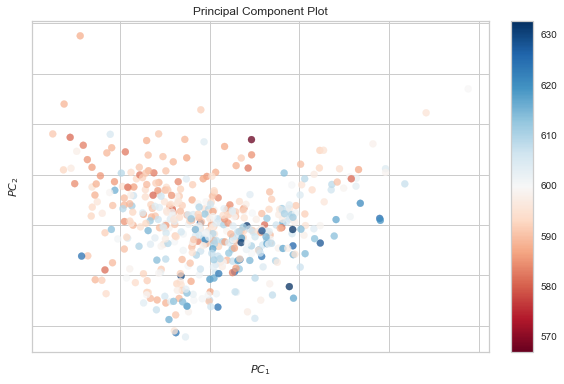

In [125]:
pca_vis = pca_decomposition(
    X_19, y_19, scale=True
)

In [124]:
pca_vis.pca_components_

array([[ 0.01308639, -0.03555699, -0.03719361, ..., -0.00587609,
         0.00072596, -0.00581308],
       [ 0.02320322,  0.0070709 , -0.01158244, ...,  0.03665287,
         0.01718971,  0.02811359]])